In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import RandomizedSearchCV



In [3]:
df=pd.read_csv('data/StudentsPerformance.csv')

In [4]:
X=df.drop('math score',axis=1)
y=df['math score']

In [6]:
##column transformer is like a pipleine where you can combine steps

In [7]:
num_features=X.select_dtypes(exclude=['object']).columns
cat_features=X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
categorical_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([
    ('OneHotEncoder',categorical_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features)
])

In [9]:
X=preprocessor.fit_transform(X)
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]], shape=(1000, 19))

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
def evaluate_model(true,pred):
    rmse=np.sqrt(mean_squared_error(true,pred))
    r2=r2_score(true,pred)
    mae=mean_absolute_error(true,pred)
    return rmse,r2,mae

In [14]:
models={
    'LinearRegression':LinearRegression(),
    'Ridge':Ridge(),
    'Lasso':Lasso(),
    'SVR':SVR(),
    'DecisionTreeRegressor':DecisionTreeRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'KNeighborsRegressor':KNeighborsRegressor(),
    'XGBRegressor':XGBRegressor(),
    'CatBoostRegressor':CatBoostRegressor(verbose=False)
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    print(list(models))
    model=list(models.values())[i]
    print(model)
    model.fit(X_train,y_train)
    pred=model.predict(X_test)
    rmse,r2,mae=evaluate_model(y_test,pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    r2_list.append(r2)

['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
LinearRegression()
LinearRegression
['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
Ridge()
Ridge
['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
Lasso()
Lasso
['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
SVR()
SVR
['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
DecisionTreeRegressor()
DecisionTreeRegre

In [15]:
print(model_list)
print(r2_list)

['LinearRegression', 'Ridge', 'Lasso', 'SVR', 'DecisionTreeRegressor', 'RandomForestRegressor', 'AdaBoostRegressor', 'KNeighborsRegressor', 'XGBRegressor', 'CatBoostRegressor']
[0.8804332983749565, 0.8805931485028738, 0.8253197323627853, 0.7286001513223704, 0.7456833775515908, 0.8500771820401822, 0.8440987280243991, 0.7838129945787431, 0.8277965784072876, 0.8516318920747058]


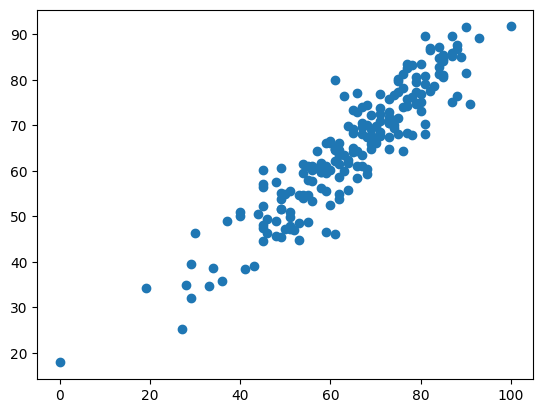

In [16]:
plt.scatter(y_test,pred)

<Axes: xlabel='math score'>

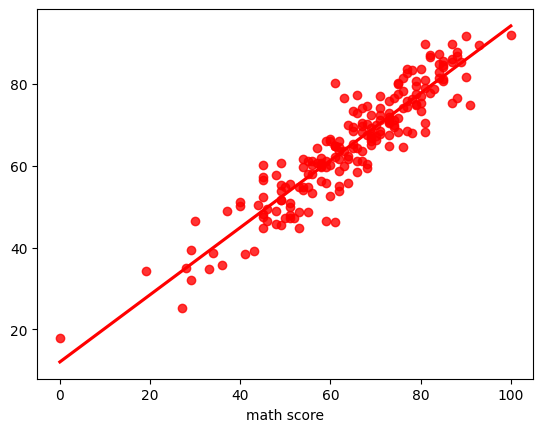

In [18]:
sns.regplot(x=y_test,y=pred,ci=None,color='red')